# Project: Investigate a Movie Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitations</a></li>
</ul>

<a id='intro'></a>
# Introduction

## This is a project towards the Udcity Data Analytics nanodegree certification

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
- Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.
- There are some odd characters
in the ‘cast’ column. Don’t worry
about cleaning them. You can
leave them as is.
- The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.

<a id='question'></a>
# Questions
## Some questions of interest that arise from the movie features are:
- Which genres are most popular?
- How has movie runtime changed over the years?
- Which genres generate more revenue?
- How has overall movie revenue changed over the years?
- which is the <strong>most popular and least popular</strong> movie?
- What are the top ten most popular movies?
- What genres do most producers produce?
- How has the cost of movie production changed over the years?

## However, we are going to answer the questions.
- How has The cost of movie production changed over the years?
- How has revenue from movie sales et'al changed over the years?
- How has profitability changed over the years?
- with respect to the 2010 inflation rate, comment on effect of inflation on overall cost overhead

we answer these questions using the actual revenue,  values and the values adjusted for the 2010 value of the Dollar

### import the needed packages

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint as pp
import os
import sys
%matplotlib inline


file = 'tmdb-movies.csv'
movie_df = pd.read_csv(file)
movie_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### Observation
The revenue and budget have no currency specified, however, the TMDb from [themoviedb](https://www.themoviedb.org/talk/58867597c3a36817620028ed), ",<em>All currency values on TMDb is assumed to be USD</em>."

#### Dimension of dtaframe

In [182]:
samples, features = movie_df.shape
print('The dataset has {} movie samples and {} features'.format(samples, features))

The dataset has 10866 movie samples and 21 features


#### Summary statistics

In [183]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### some deductions from the summary decription
- Most movies turn out to be profitable, althou some m
- Most movies have an average runtime of <em>102 mins</em>
- The dataset contains no details of movies released after 2015
 ##### Note:
  ##### This is a summary descriptive statistics, and is not a subtitue for the required indepth analysis and conclusion

<a id='wrangling'></a>
# Data Wrangling
#### 1. Create a new dataframe(df) from a copy of the Movie_df
#### 2. Drop duplicate movie samples
#### 3. Add features relevant to the analysis

##### we create a new dataframe using the columns relevant to our analysis

    ['original_title','release_year','budget','revenue','budget_adj','revenue_adj']

##### Other features are important but not with respect to our analysis

### 1. create new dataframe from our old dataframe

In [184]:
cols_to_use = np.array(['original_title','release_year','budget','revenue','budget_adj','revenue_adj'])
df = movie_df[cols_to_use].copy()
df.head()

,original_title,release_year,budget,revenue,budget_adj,revenue_adj
0,Jurassic World,2015,150000000,1513528810,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,2015,150000000,378436354,1.379999e+08,3.481613e+08
2,Insurgent,2015,110000000,295238201,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,2015,200000000,2068178225,1.839999e+08,1.902723e+09
4,Furious 7,2015,190000000,1506249360,1.747999e+08,1.385749e+09


In [185]:
df.describe()

,release_year,budget,revenue,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,1.086600e+04,1.086600e+04
mean,2001.322658,1.462570e+07,3.982332e+07,1.755104e+07,5.136436e+07
std,12.812941,3.091321e+07,1.170035e+08,3.430616e+07,1.446325e+08
min,1960.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2011.000000,1.500000e+07,2.400000e+07,2.085325e+07,3.369710e+07
max,2015.000000,4.250000e+08,2.781506e+09,4.250000e+08,2.827124e+09


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   original_title  10866 non-null  object 
 1   release_year    10866 non-null  int64  
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   budget_adj      10866 non-null  float64
 5   revenue_adj     10866 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 509.5+ KB


### clearly there are no empty cells in our new dataframe

### 2. Drop duplicate movie samples

In [187]:
print("The new tmdb dataset has {} duplicated movie samples".format(df.duplicated().sum()))

The new tmdb dataset has 2 duplicated movie samples


#### We then drop duplicate rows(samples) keeping the first instance of their occurence.

In [188]:
df.drop_duplicates(keep='first', inplace=True)

##### Check for features with null values

In [189]:
df.isnull().sum()

original_title    0
release_year      0
budget            0
revenue           0
budget_adj        0
revenue_adj       0
dtype: int64

##### clearly we have no features with missing entries in our extracted DataFrame

### 3. Add feature(s) relevant to our analysis.

In [190]:
df.insert(4,'profit',df['revenue']-df['budget'])
df.insert(7,'profit_adj',df['revenue_adj']-df['budget_adj'])
df.head()

,original_title,release_year,budget,revenue,profit,budget_adj,revenue_adj,profit_adj
0,Jurassic World,2015,150000000,1513528810,1363528810,1.379999e+08,1.392446e+09,1.254446e+09
1,Mad Max: Fury Road,2015,150000000,378436354,228436354,1.379999e+08,3.481613e+08,2.101614e+08
2,Insurgent,2015,110000000,295238201,185238201,1.012000e+08,2.716190e+08,1.704191e+08
3,Star Wars: The Force Awakens,2015,200000000,2068178225,1868178225,1.839999e+08,1.902723e+09,1.718723e+09
4,Furious 7,2015,190000000,1506249360,1316249360,1.747999e+08,1.385749e+09,1.210949e+09


In [191]:
df.describe()

,release_year,budget,revenue,profit,budget_adj,revenue_adj,profit_adj
count,10864.000000,1.086400e+04,1.086400e+04,1.086400e+04,1.086400e+04,1.086400e+04,1.086400e+04
mean,2001.320784,1.462563e+07,3.983056e+07,2.520493e+07,1.755151e+07,5.137373e+07,3.382222e+07
std,12.813360,3.091539e+07,1.170130e+08,9.659517e+07,3.430869e+07,1.446442e+08,1.252247e+08
min,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08,0.000000e+00,0.000000e+00,-4.139124e+08
25%,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2011.000000,1.500000e+07,2.400183e+07,9.094340e+06,2.085325e+07,3.370925e+07,1.293994e+07
max,2015.000000,4.250000e+08,2.781506e+09,2.544506e+09,4.250000e+08,2.827124e+09,2.750137e+09


array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'profit'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>],
       [<AxesSubplot:title={'center':'profit_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

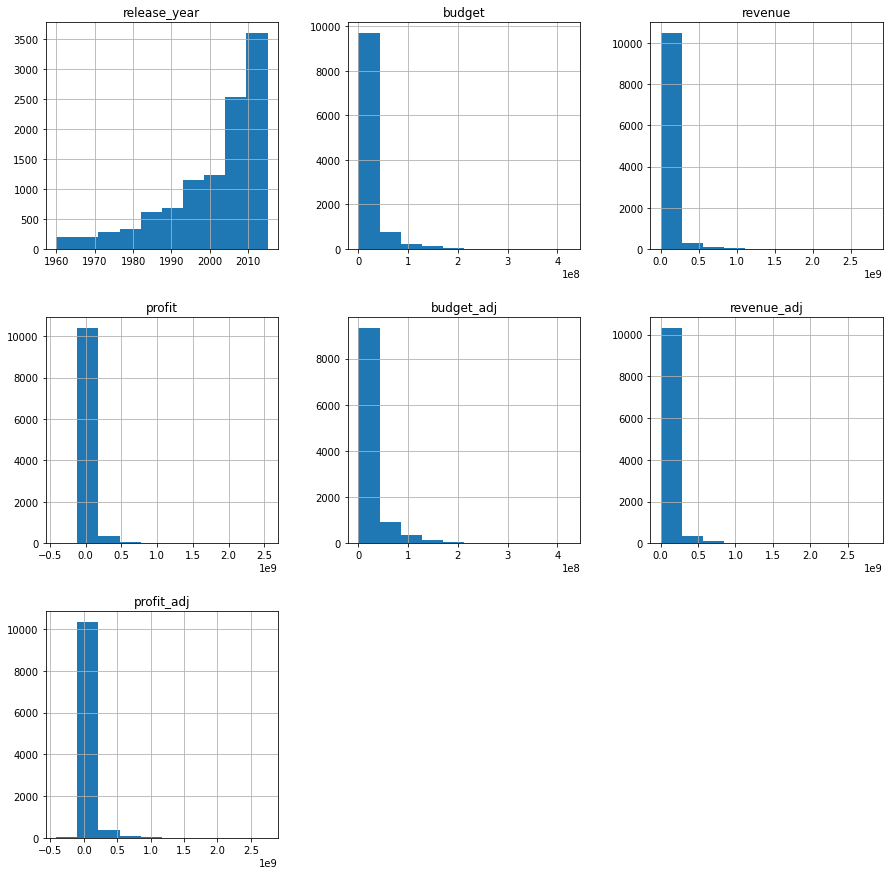

In [192]:
df.hist(figsize=(15,15))

### With the exception of the release year, all other features are skewed to the right.
- Statistically, this implies that the large values occur with a low frequency.
- Thus we can say that Movies with high budget, revenue and profit occur with very low frequencies.
- A right skewed data occurs due to peak values at initial stage which then decline with time.

<AxesSubplot:>

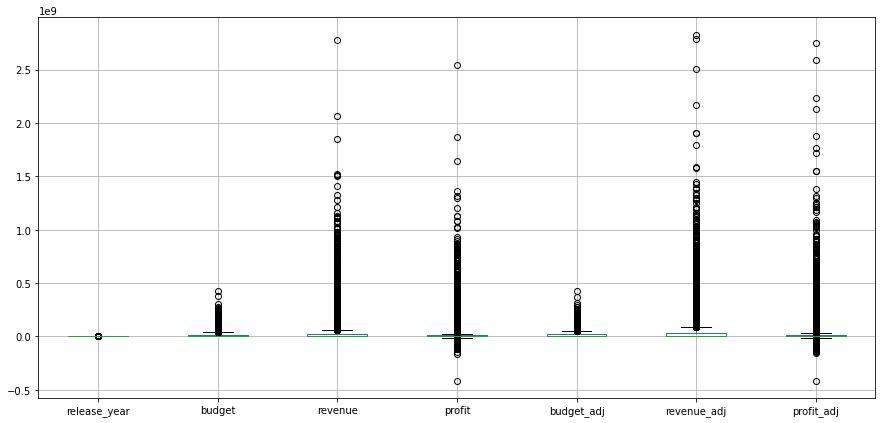

In [193]:
df.boxplot(figsize=(15,7))

- The movie industry is a purely commercial structure (low budget, high profit)
- We can seee possible outliers at figures of 2.5e9 ~> 2.5 billion Dollars. (That's huge:))
- We can also see some losses with an outlier clsose to -0.5e9 ~> 500 million Dollars (a great loss :()
- We can also see that most movies make reasonable returns on the invested capital.
- Lastly, very few movies record losses.

<a id='eda'></a>
# Exploratory Data Analysis

### function to compute data and make our plots

In [194]:
def feature_info_plot(col_name):
    #data_setup
    Title = f"yearly {col_name}"
    temp_data = df.groupby('release_year')[col_name].sum()
    
    #plot_face
    plt.figure(figsize=(15,5))
    plt.plot(temp_data)
    plt.title(Title)
    plt.xlabel('year')
    plt.ylabel(col_name)
    plt.show()

### function for max and min values

In [195]:
def high_and_low(col_name):
    #for highest earned profit
    high= df[col_name].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[col_name].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

### function for line of best fit

In [196]:
def plot_best_fit(col_name):
    #data setup
    Title = f"yearly {col_name}"
    temp_data = df.groupby('release_year')[col_name].sum()
    pds = pd.Series(temp_data)
    years = np.array(pds.index.values)
    yearly_values = np.array([pds[i] for i in years])
    x,y = years, yearly_values
    
    #gradient and intercept
    m,c = np.polyfit(x, y, 1)
    
    #plot of best fit
    plt.figure(figsize=(15,5))
    plt.plot(x,y,'*')
    plt.plot(x, m*x + c)
    plt.title(Title)
    plt.xlabel('year')
    plt.ylabel(col_name)
    plt.show()

#### Function for 2 variable correlation

In [197]:
def corr_plot(col1, col2):
    df.plot(x=col1, y=col2, kind='scatter')

### Q1. How has the cost of movie production changed over the years?

<strong>Note</strong>: The Budget is the overhead cost of movie production.

###### we plot for yearly budget adjusted/unadjusted

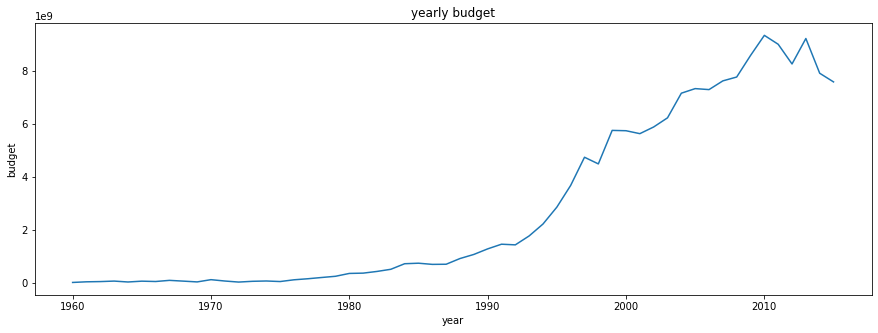

In [198]:
feature_info_plot('budget')

##### This shows a a cyclical structure with a an increasing trend

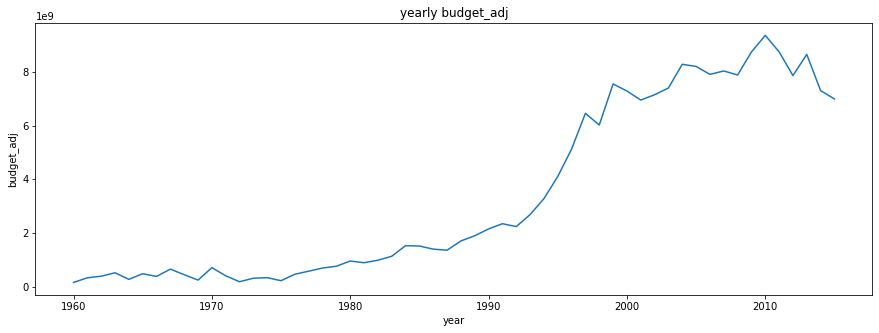

In [199]:
feature_info_plot('budget_adj')

###### budget plot of best fit

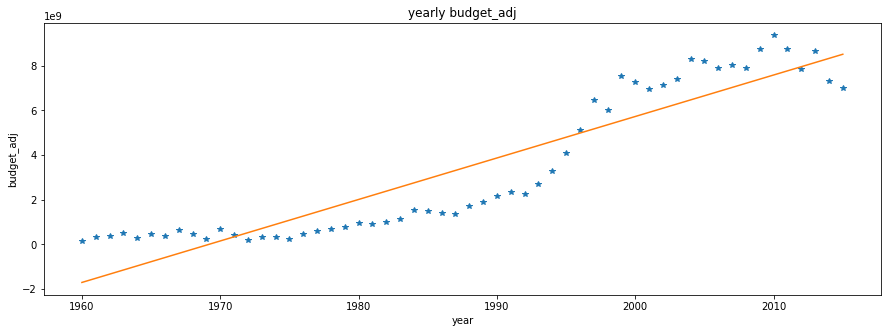

In [200]:
plot_best_fit('budget_adj')

###### from the plot above, we see a cyclical pattern with an increase year after year

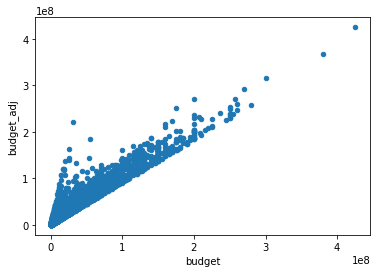

In [201]:
corr_plot('budget','budget_adj')

 ###### inflation has a significant effect on budget

In [202]:
pd.concat([high_and_low('budget'), high_and_low('budget_adj')], axis=1)

,2244,30,2244,30
original_title,The Warrior's Way,Mr. Holmes,The Warrior's Way,Mr. Holmes
release_year,2010,2015,2010,2015
budget,425000000,0,425000000,0
revenue,11087569,29355203,11087569,29355203
profit,-413912431,29355203,-413912431,29355203
budget_adj,425000000.0,0.0,425000000.0,0.0
revenue_adj,11087569.0,27006774.877019,11087569.0,27006774.877019
profit_adj,-413912431.0,27006774.877019,-413912431.0,27006774.877019


###### For the adjusted and unadjusted values
- The movie with the highest budget is <strong>The Warriors Way</strong>
- The movie with the lowest budget is <strong>Mr Holmes</strong>

### Q2. How has revenue from movie sales and publicity changed over the the years

###### plot for yearly revenue unadjusted/unadjusted

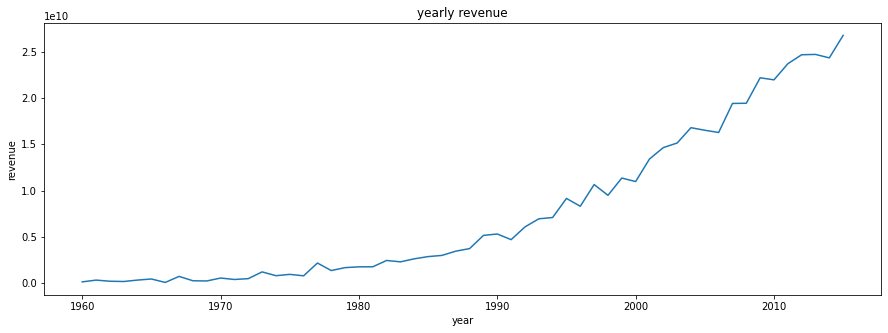

In [203]:
feature_info_plot('revenue')

###### This indicates an increasing trend

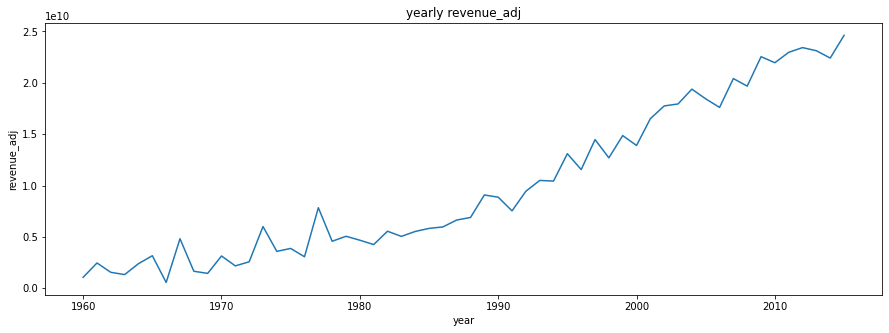

In [204]:
feature_info_plot('revenue_adj')

###### This indicates an increasing trend

##### we plot for best fit

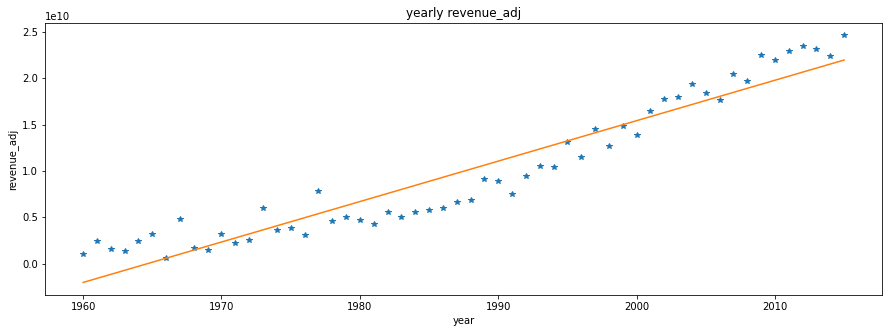

In [205]:
plot_best_fit('revenue_adj')

###### From the above plot, we see that despite short-term seasonality, revenue continues to rise year after year

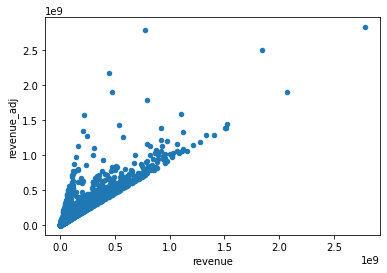

In [206]:
corr_plot('revenue','revenue_adj')

###### Inflation has a significant effect on revenue

In [207]:
pd.concat([high_and_low('revenue'), high_and_low('revenue_adj')], axis=1)

,1386,48,1386,48
original_title,Avatar,Wild Card,Avatar,Wild Card
release_year,2009,2015,2009,2015
budget,237000000,30000000,237000000,30000000
revenue,2781505847,0,2781505847,0
profit,2544505847,-30000000,2544505847,-30000000
budget_adj,240886902.887613,27599987.856005,240886902.887613,27599987.856005
revenue_adj,2827123750.41189,0.0,2827123750.41189,0.0
profit_adj,2586236847.524277,-27599987.856005,2586236847.524277,-27599987.856005


###### For the uadjusted and unadjusted values
- The movie with the highest revenue is <strong>Avatar</strong> ~> 2.8 billion Dollars
- The movie with the lowest revenue is <strong>Wild Card</strong> ~> 0.0 dollars

### Q3. How Profitable has movie production been over the years.

###### plots for profit values unadjusted

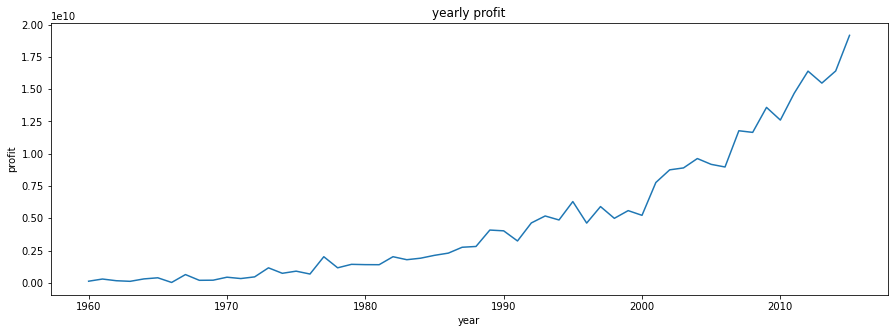

In [208]:
feature_info_plot('profit')

##### The profit has an increasing trend

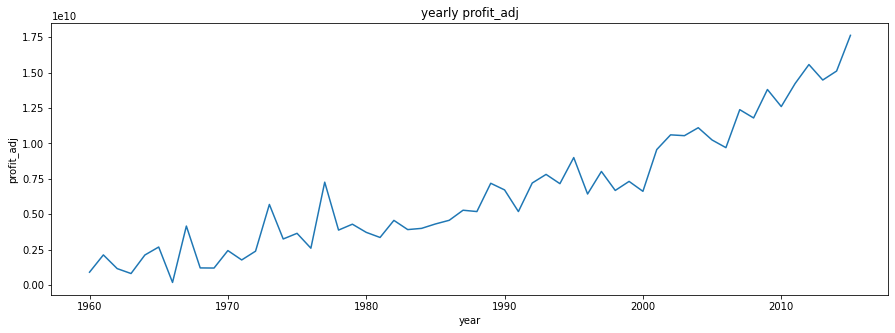

In [209]:
feature_info_plot('profit_adj')

##### The fluctuation indicates a seasonal increase/decrease in the cumulative profit for athet year and NOT a loss

###### profit plot of best fit

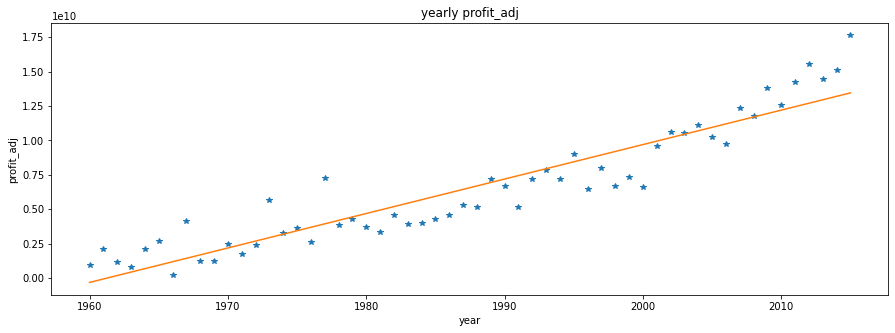

In [210]:
plot_best_fit('profit_adj')

###### From the plot above, we see that profit continues to rise year after year

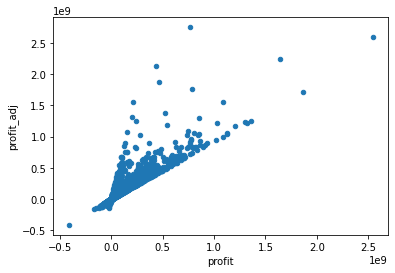

In [211]:
corr_plot('profit','profit_adj')

###### Inflation has a significant effect on profit

In [212]:
pd.concat([high_and_low('profit'), high_and_low('profit_adj')], axis=1)

,1386,2244,1329,2244
original_title,Avatar,The Warrior's Way,Star Wars,The Warrior's Way
release_year,2009,2010,1977,2010
budget,237000000,425000000,11000000,425000000
revenue,2781505847,11087569,775398007,11087569
profit,2544505847,-413912431,764398007,-413912431
budget_adj,240886902.887613,425000000.0,39575591.358274,425000000.0
revenue_adj,2827123750.41189,11087569.0,2789712242.27745,11087569.0
profit_adj,2586236847.524277,-413912431.0,2750136650.919176,-413912431.0


###### For the unadjusted values
- The movie with the highest profit is <strong>Avatar</strong> ~> 2.5 billion Dollars
- The movie with the lowest profit is <strong>The Warrior's Way</strong> ~> -414 million Dollars

###### For the adjusted values
- The movie with the highest profit is <strong>Star Wars</strong> ~> 2.7 billion Dollars
- The movie with the lowest profit is <strong>The Warrior's Way</strong> -414 million Dollars

<AxesSubplot:xlabel='budget', ylabel='revenue'>

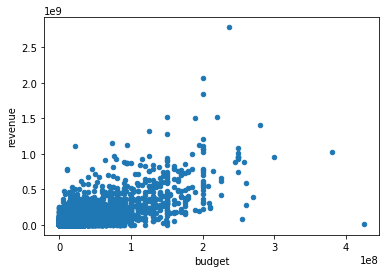

In [213]:
df.plot(x='budget',y='revenue',kind='scatter')

##### This indicates mild correlation between budget and profit thus we cannot conclude that budget affects profit

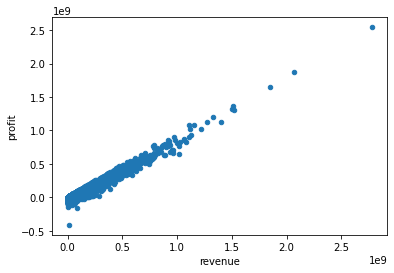

In [214]:
corr_plot('revenue','profit')

###### We can see that revenue is a good indicator of profit. Thus high revenue == high profit and vice versa...

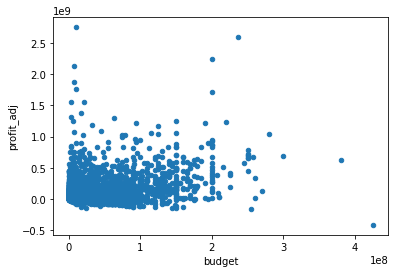

In [215]:
corr_plot('budget','profit_adj')

###### There is no clear indication of inflation affecting profit

# Conculusions

#### 1. Budget
- There was a sharp increase in cost of movie production from te early 1990s and peaked in the year 2009-2010 and then begins to decline.
- The rising cost of movie production between the 1990s and the year 2010 could be attributed to the use of <em>state of the art technological equipments</em> in movie oroduction.
- The decline from the year 2010 could be attributed to increased adoption which has cut down the required manpower, thereby reducing the overall budget.

##### 2. Revenue
- Movie revenue has seen an almost steady increase since the birth of movie production
- Inflation has had little effect on Movie Revenue.
- This shows growing interest in viewership.

##### 3. Profit
- The overall profit shows some seasonality but has a summarily profitable trend

- from the high and low dataframes, we can see that a movie budget is not always an indicator high revenue or profit 

#### Financial advice
- For an investor who wants to know if an investments in the movie industry is a worthy in the longterm, my answer is this <em>since there is no significant difference in the adjusted and axctual values of the budget, revenue, and profit, the data at hand that the movie Industry is investment worthy</em>.

<a id='limitation'></a>
# Limitations

###### Though this analyis has been well conducted with all neccasry interpretations and visualisations, 
- Since this analysis was conducted in the year 2022, the adjusted values should have been that of 2022 instead.
- Despite significant effect of inflation on each feature, there is no clear indication of inflation affecting profit so we cannot conclude that the Movie industry is worth investing into for a longterm
 - <strong>NOTE:</strong>This is not to contradict the financial recommendation earlier stated